### IMPORTOWANIE BIBLIOTEK

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import datetime

### WCZYTANIE I ZAPOZNANIE SIĘ Z DANYMI

In [ ]:
airlines = pd.read_csv(r"C:\Users\szymo\OneDrive\Pulpit\final_project\flights\airlines.csv")
flights = pd.read_csv(r"C:\Users\szymo\OneDrive\Pulpit\final_project\flights\flights.csv")
airports = pd.read_csv(r"C:\Users\szymo\OneDrive\Pulpit\final_project\flights\airports.csv")

C:\Users\szymo\AppData\Local\Temp\ipykernel_7260\3947608098.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(r"C:\Users\szymo\OneDrive\Pulpit\final_project\flights\flights.csv")


In [ ]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [ ]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

### SPRWADZANIE ILOŚCI WARTOŚCI NULL I NAN W ZBIORZE

In [ ]:
count = 0
for i in flights.columns:
  null = flights[f'{i}'].isnull().sum()
  na = flights[f'{i}'].isna().sum()
  print(f'nr {count} kolumna {i} ma {null} wartości null, {na} wartości nan')
  count += 1

nr 0 kolumna YEAR ma 0 wartości null, 0 wartości nan
nr 1 kolumna MONTH ma 0 wartości null, 0 wartości nan
nr 2 kolumna DAY ma 0 wartości null, 0 wartości nan
nr 3 kolumna DAY_OF_WEEK ma 0 wartości null, 0 wartości nan
nr 4 kolumna AIRLINE ma 0 wartości null, 0 wartości nan
nr 5 kolumna FLIGHT_NUMBER ma 0 wartości null, 0 wartości nan
nr 6 kolumna TAIL_NUMBER ma 14721 wartości null, 14721 wartości nan
nr 7 kolumna ORIGIN_AIRPORT ma 0 wartości null, 0 wartości nan
nr 8 kolumna DESTINATION_AIRPORT ma 0 wartości null, 0 wartości nan
nr 9 kolumna SCHEDULED_DEPARTURE ma 0 wartości null, 0 wartości nan
nr 10 kolumna DEPARTURE_TIME ma 86153 wartości null, 86153 wartości nan
nr 11 kolumna DEPARTURE_DELAY ma 86153 wartości null, 86153 wartości nan
nr 12 kolumna TAXI_OUT ma 89047 wartości null, 89047 wartości nan
nr 13 kolumna WHEELS_OFF ma 89047 wartości null, 89047 wartości nan
nr 14 kolumna SCHEDULED_TIME ma 6 wartości null, 6 wartości nan
nr 15 kolumna ELAPSED_TIME ma 105071 wartości null, 1

### SPRAWDZAMY CZY 'DEPARTURE_TIME' I 'DEPARTURE_DELAY' MAJĄ WARTOŚCI NAN W TYCH SAMYCH WIERSZACH, BĘDZIE TO ZNACZYŁO NAJPRAWDOPODOBNIEJ, ŻE SAMOLOT WYLECIAŁ NA CZAS


In [ ]:
flights[flights['DEPARTURE_TIME'].isna() | flights['DEPARTURE_DELAY'].isna()][['DEPARTURE_TIME', 'DEPARTURE_DELAY']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 86153 entries, 32 to 5818843
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DEPARTURE_TIME   0 non-null      float64
 1   DEPARTURE_DELAY  0 non-null      float64
dtypes: float64(2)
memory usage: 2.0 MB


### ZMIANA POWODU ODWOŁANIA LOTU NA TYP CATEGORY

In [ ]:
flights['CANCELLATION_REASON'] = flights['CANCELLATION_REASON'].astype('category').cat.codes

### UZUPEŁNIANIE 'SPECJALNYCH OPÓŹNIEŃ' ZERAMI OZNACZAJĄCYMI BRAK WYSTĄPIENIA DANEGO OPÓŻNIENIA

In [ ]:
flights['AIR_SYSTEM_DELAY'].fillna(0, inplace=True)
flights['SECURITY_DELAY'].fillna(0, inplace=True)
flights['AIRLINE_DELAY'].fillna(0, inplace=True)
flights['LATE_AIRCRAFT_DELAY'].fillna(0, inplace=True)
flights['WEATHER_DELAY'].fillna(0, inplace=True)

### USUNIĘCIE MNIEJ ISTOTNYCH KOLUMN

In [ ]:
#można użyć do uzupełnienia brakujących numerów samolot, użylibyśmy naczęściej występującego numeru dla danej lini lotniczej
#flights.groupby('AIRLINE')['TAIL_NUMBER'].value_counts().groupby(level=0).idxmax()

In [ ]:
flights.drop(columns=['TAIL_NUMBER', 'FLIGHT_NUMBER'], inplace=True)

### USUNIĘCIE RESZTY OBSERWACJI Z WARTOŚCIMI NAN, TRACIMY MAŁO DANYCH I NIE UZUPEŁNIAMY SZTUCZNYMI WARTOŚCIMI

In [ ]:
flights = flights.dropna()

In [ ]:
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5714008 non-null  int64  
 1   MONTH                5714008 non-null  int64  
 2   DAY                  5714008 non-null  int64  
 3   DAY_OF_WEEK          5714008 non-null  int64  
 4   AIRLINE              5714008 non-null  object 
 5   ORIGIN_AIRPORT       5714008 non-null  object 
 6   DESTINATION_AIRPORT  5714008 non-null  object 
 7   SCHEDULED_DEPARTURE  5714008 non-null  int64  
 8   DEPARTURE_TIME       5714008 non-null  float64
 9   DEPARTURE_DELAY      5714008 non-null  float64
 10  TAXI_OUT             5714008 non-null  float64
 11  WHEELS_OFF           5714008 non-null  float64
 12  SCHEDULED_TIME       5714008 non-null  float64
 13  ELAPSED_TIME         5714008 non-null  float64
 14  AIR_TIME             5714008 non-null  float64
 15  DIS

### SPRAWDZENIE CZY POZOSTAWIENIE TYPU FLOAT MA SENS, BY PÓŹNIEJ PODJĄĆ SIĘ ZMIANY TYPU

In [ ]:
#bierzemy kolumny z wartościami numerycznymi
num_type_columns = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [ ]:
#funkcja sprawdzająca, czy w danej kolumnie występują liczby mające po przecinku cyfrę inną niż 0 
def float_check(name):
  arr = flights[name].unique()
  check = np.any(arr % 1 != 0)
  return print(check)

In [ ]:
#sprawdzamy dla każdej kolumny z wartościami numerycznymi
for i in num_type_columns:
  float_check(i)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


### ZMIANA TYPU WARTOŚCI W KOLUMNACH ZAWIERAJĄCYCH GODZINĘ W POSTACI 345 = 03:45, BY ŁATWIEJ BYŁO JE PRZETWARZAĆ I WYEKSTRAKTOWAĆ OSOBNO GODZINY I MINUTY

In [ ]:
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].astype(int)
flights['WHEELS_OFF'] = flights['WHEELS_OFF'].astype(int)
flights['WHEELS_ON'] = flights['WHEELS_ON'].astype(int)
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].astype(int)

In [ ]:
#dane czasowe - SCHEDULED_DEPARTURE, DEPARTURE_TIME, WHEELS_OFF, WHEELS_ON, SCHEDULED_ARRIVAL, ARRIVAL_TIME
#podział na dwie kolumny w godziną i minutą
type_time = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']
counter = 0
for i in type_time:
  flights[f'{i}'] = flights[f'{i}'].astype(str).str.zfill(4)

In [ ]:
for i in type_time:
  flights[f'{i}_HOUR'] = flights[f'{i}'].str[:2]
  flights[f'{i}_MINUTE'] = flights[f'{i}'].str[2:]

In [ ]:
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 41 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   YEAR                        5714008 non-null  int64  
 1   MONTH                       5714008 non-null  int64  
 2   DAY                         5714008 non-null  int64  
 3   DAY_OF_WEEK                 5714008 non-null  int64  
 4   AIRLINE                     5714008 non-null  object 
 5   ORIGIN_AIRPORT              5714008 non-null  object 
 6   DESTINATION_AIRPORT         5714008 non-null  object 
 7   SCHEDULED_DEPARTURE         5714008 non-null  object 
 8   DEPARTURE_TIME              5714008 non-null  object 
 9   DEPARTURE_DELAY             5714008 non-null  float64
 10  TAXI_OUT                    5714008 non-null  float64
 11  WHEELS_OFF                  5714008 non-null  object 
 12  SCHEDULED_TIME              5714008 non-null  float64
 13  EL

In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,WHEELS_ON_HOUR,WHEELS_ON_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_MINUTE
0,2015,1,1,4,AS,ANC,SEA,0005,2354,-11.0,...,23,54,00,15,04,04,04,30,04,08
1,2015,1,1,4,AA,LAX,PBI,0010,0002,-8.0,...,00,02,00,14,07,37,07,50,07,41
2,2015,1,1,4,US,SFO,CLT,0020,0018,-2.0,...,00,18,00,34,08,00,08,06,08,11
3,2015,1,1,4,AA,LAX,MIA,0020,0015,-5.0,...,00,15,00,30,07,48,08,05,07,56
4,2015,1,1,4,AS,SEA,ANC,0025,0024,-1.0,...,00,24,00,35,02,54,03,20,02,59


### ZMIANA WARTOŚCI FLOAT NA INT

In [ ]:
num_type_columns2 = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_DEPARTURE_MINUTE', 'DEPARTURE_TIME_HOUR',
       'DEPARTURE_TIME_MINUTE', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE',
       'WHEELS_ON_HOUR', 'WHEELS_ON_MINUTE', 'SCHEDULED_ARRIVAL_HOUR',
       'SCHEDULED_ARRIVAL_MINUTE', 'ARRIVAL_TIME_HOUR', 'ARRIVAL_TIME_MINUTE']

In [ ]:
#funkcja zmieniająca typ wartości na inta 
def type_int(name):
  flights[name] = flights[name].astype(int)

In [ ]:
#sprawdzamy dla każdej kolumny z wartościami numerycznymi
for i in num_type_columns2:
   type_int(i)

### WYKRESY

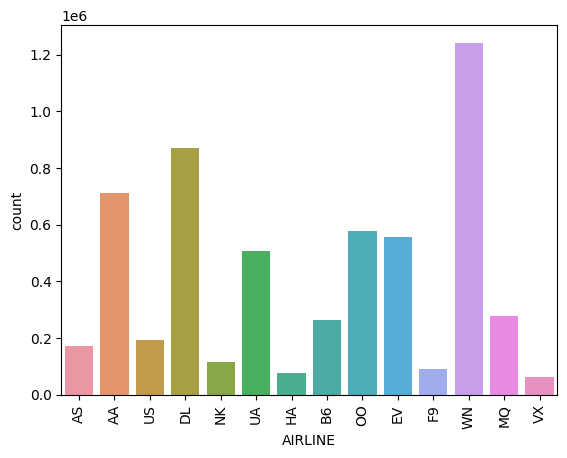

In [ ]:
g=sns.countplot(x='AIRLINE', data=flights)
g.xaxis.set_tick_params(rotation=90)

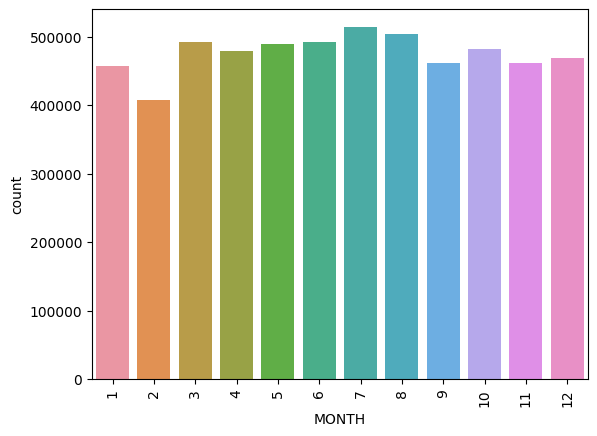

In [ ]:
g=sns.countplot(x='MONTH', data=flights)
g.xaxis.set_tick_params(rotation=90)

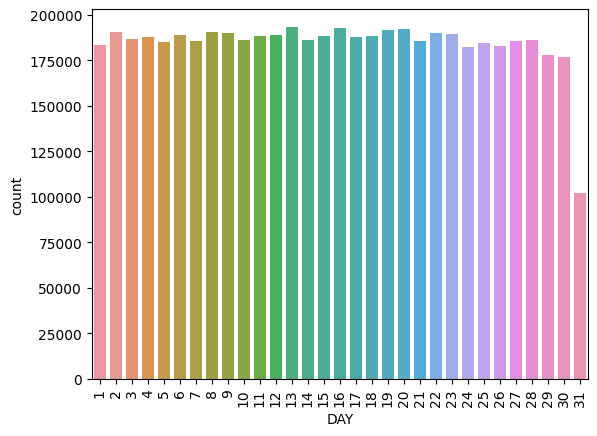

In [ ]:
g=sns.countplot(x='DAY', data=flights)
g.xaxis.set_tick_params(rotation=90)

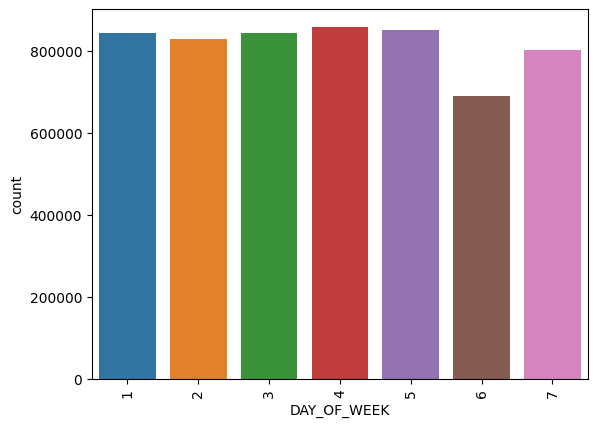

In [ ]:
g=sns.countplot(x='DAY_OF_WEEK', data=flights)
g.xaxis.set_tick_params(rotation=90)

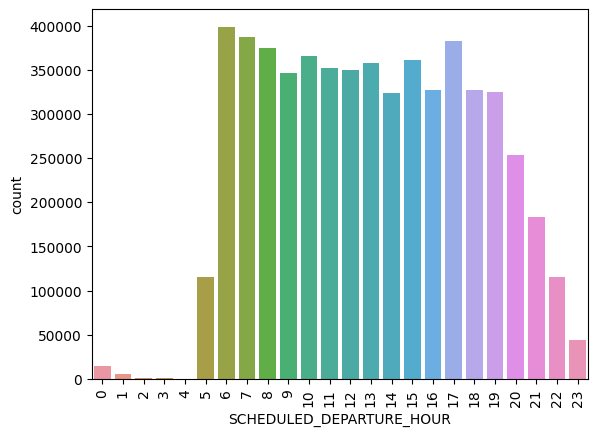

In [ ]:
g=sns.countplot(x='SCHEDULED_DEPARTURE_HOUR', data=flights)
g.xaxis.set_tick_params(rotation=90)

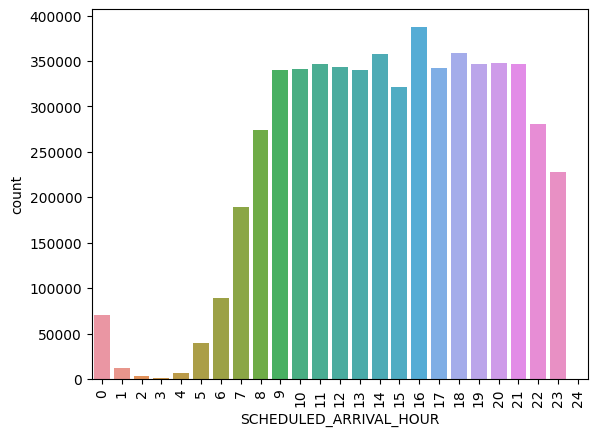

In [ ]:
g=sns.countplot(x='SCHEDULED_ARRIVAL_HOUR', data=flights)
g.xaxis.set_tick_params(rotation=90)

([<matplotlib.axis.XTick at 0x26899947700>,
 [Text(0, 0, '7'),
  Text(50, 0, '57'),
  Text(100, 0, '107'),
  Text(150, 0, '157'),
  Text(200, 0, '207'),
  Text(250, 0, '257'),
  Text(300, 0, '307'),
  Text(350, 0, '357')])

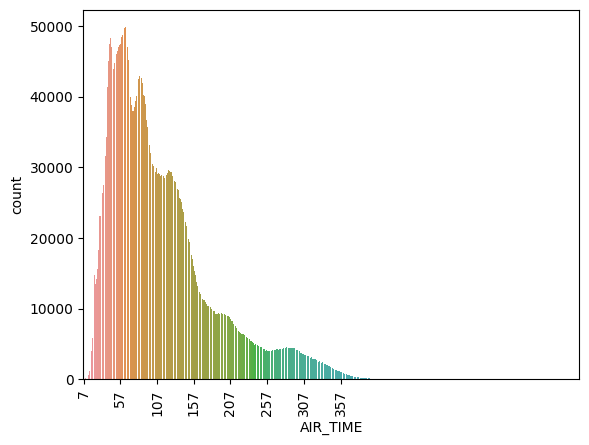

In [ ]:
g=sns.countplot(x='AIR_TIME', data=flights)
g.xaxis.set_tick_params(rotation=90)
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350])

([<matplotlib.axis.XTick at 0x267c9224c40>,
 [Text(0, 0, '7'),
  Text(500, 0, '507'),
  Text(1000, 0, ''),
  Text(1500, 0, ''),
  Text(2000, 0, ''),
  Text(2500, 0, ''),
  Text(3000, 0, ''),
  Text(3500, 0, ''),
  Text(4000, 0, ''),
  Text(4500, 0, '')])

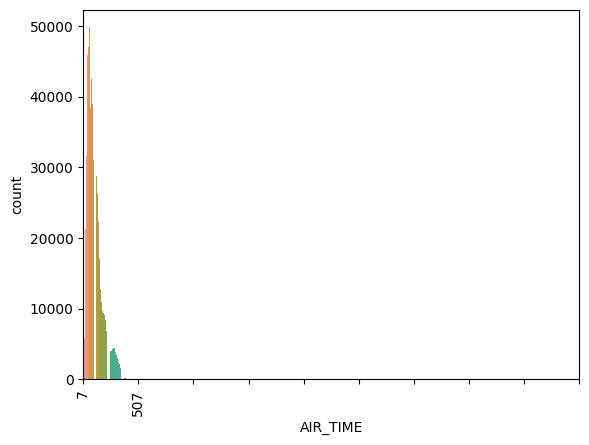

In [ ]:
g=sns.countplot(x='AIR_TIME', data=flights)
g.xaxis.set_tick_params(rotation=90)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

### ZMIANA TYPU WARTOŚCI W KOLUMNIE 'AIRLINE' NA TYP CATEGORY

In [ ]:
flights['AIRLINE'].unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9',
       'WN', 'MQ', 'VX'], dtype=object)

In [ ]:
flights['AIRLINE'] = flights['AIRLINE'].astype('category').cat.codes

### USUNIĘCIE KOLUMN 'ORIGIN_AIRPORT' I 'DESTINATION_AIRPORT'

In [ ]:
flights.drop(columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], inplace=True)

In [ ]:
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   YEAR                        5714008 non-null  int32
 1   MONTH                       5714008 non-null  int32
 2   DAY                         5714008 non-null  int32
 3   DAY_OF_WEEK                 5714008 non-null  int32
 4   AIRLINE                     5714008 non-null  int8 
 5   SCHEDULED_DEPARTURE         5714008 non-null  int32
 6   DEPARTURE_TIME              5714008 non-null  int32
 7   DEPARTURE_DELAY             5714008 non-null  int32
 8   TAXI_OUT                    5714008 non-null  int32
 9   WHEELS_OFF                  5714008 non-null  int32
 10  SCHEDULED_TIME              5714008 non-null  int32
 11  ELAPSED_TIME                5714008 non-null  int32
 12  AIR_TIME                    5714008 non-null  int32
 13  DISTANCE                    5714

### STWORZENIE KOLUMNY Z BINARNYM TARGETEM - OPÓŹNIENIE SAMOLOTU TAK(OPÓŹNIONY): 1, NIE: 0

In [ ]:
flights['DELAY'] = flights['ARRIVAL_DELAY'].apply(lambda x: 0 if x <= 0 else 1)

In [ ]:
### SPRAWDZENIE ZBALANSOWANIE TARGETU

In [ ]:
flights['DELAY'].value_counts()

DELAY
0    3627112
1    2086896
Name: count, dtype: int64

In [ ]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_DEPARTURE_MINUTE', 'DEPARTURE_TIME_HOUR',
       'DEPARTURE_TIME_MINUTE', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE',
       'WHEELS_ON_HOUR', 'WHEELS_ON_MINUTE', 'SCHEDULED_ARRIVAL_HOUR',
       'SCHEDULED_ARRIVAL_MINUTE', 'ARRIVAL_TIME_HOUR', 'ARRIVAL_TIME_MINUTE',
       'DELAY'],
      dtype='object')

### INICJALIZACJA DANYCH DO MODELU PREDYKCYJNEGO

In [ ]:
X = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_DEPARTURE_MINUTE', 'DEPARTURE_TIME_HOUR',
       'DEPARTURE_TIME_MINUTE', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE',
       'WHEELS_ON_HOUR', 'WHEELS_ON_MINUTE', 'SCHEDULED_ARRIVAL_HOUR',
       'SCHEDULED_ARRIVAL_MINUTE', 'ARRIVAL_TIME_HOUR', 'ARRIVAL_TIME_MINUTE']]
y = flights['DELAY']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### BALANSOWANIE
##### ZE WZGLĘDU NA DUŻY ZBIÓR DANYCH SMOTE ZAJMOWAŁ ZA DUŻO CZASU DLATEGO ZOSTAŁ UŻYTY OVERSAMPLING, KTÓREGO CZAS BYŁ BARDZO OPTYMALNY

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:

over = RandomOverSampler(random_state=123)
X_train, y_train = over.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train)

Counter({1: 2901474, 0: 2901474})

#### STANDARYZACJA - W POZOSTAŁYCH 

#### NORMALIZACJA - Z REGUŁY MÓWI SIĘ BY NORMALIZACJĘ STOSOWAĆ W TYCH ALGORYTMACH, KTÓRE NIE PRZYJMÓJĄ ZAŁOŻEŃ NA TEMAT NORMALNOŚCI ROZKŁADU NP. KNN, SIECI NEURONOWE 

#### BRAK - DRZEWO DECYZYJNE, RANDOM FOREST, FEATURE SCALING NIE JEST WYMAGANY, GDYŻ DECYZJE W TYCH ALGORYTMACH SĄ PODEJMOWANE NA PODSTAWIE REGUŁ PEWNYCH PROGÓW WARTOŚCI, KTÓRE DZIELĄ ZZBIÓR DANYCH NA PODZBIORY, A SKALOWANIE DANYCH NIE WPŁYWA NA TE PODZIAŁY

### POBIERANIE METRYK DO SPRAWDZENIA JAKOŚCI MODELU

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# DRZEWO DECYZYJNE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_tree_train = tree_model.predict(X_train)
y_pred_tree_test = tree_model.predict(X_test)
y_prob_tree_train = tree_model.predict_proba(X_train)[:, 1]
y_prob_tree_test = tree_model.predict_proba(X_test)[:, 1]

#### SPRAWDZAMY PODSTAWOWE METRYKI I MACIERZ BŁĘDU

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2901474
           1       1.00      1.00      1.00   2901474

    accuracy                           1.00   5802948
   macro avg       1.00      1.00      1.00   5802948
weighted avg       1.00      1.00      1.00   5802948



<Axes: >

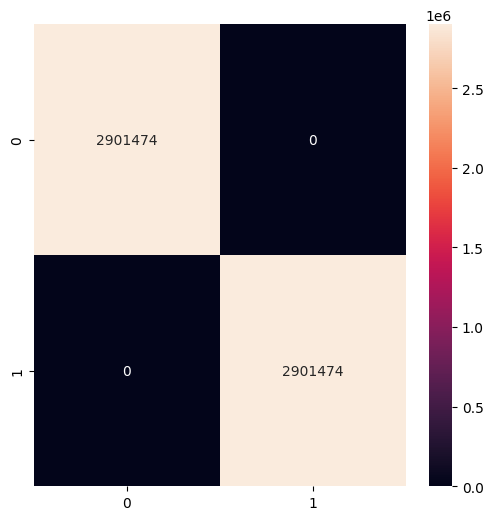

In [ ]:
print(classification_report(y_train, y_pred_tree_train))

cm = confusion_matrix(y_train, y_pred_tree_train)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    725638
           1       1.00      1.00      1.00    417164

    accuracy                           1.00   1142802
   macro avg       1.00      1.00      1.00   1142802
weighted avg       1.00      1.00      1.00   1142802



<Axes: >

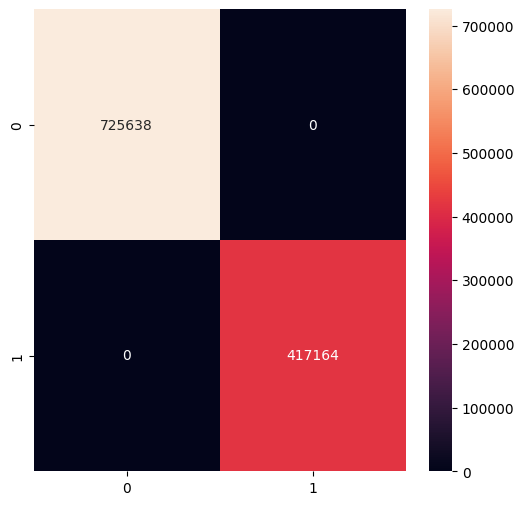

In [ ]:
print(classification_report(y_test, y_pred_tree_test))

cm = confusion_matrix(y_test, y_pred_tree_test)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

#### RYSUJEMY KRZYWĄ ROC POKAZUJĄCĄ JAKOŚĆ KLASYFIKATORA

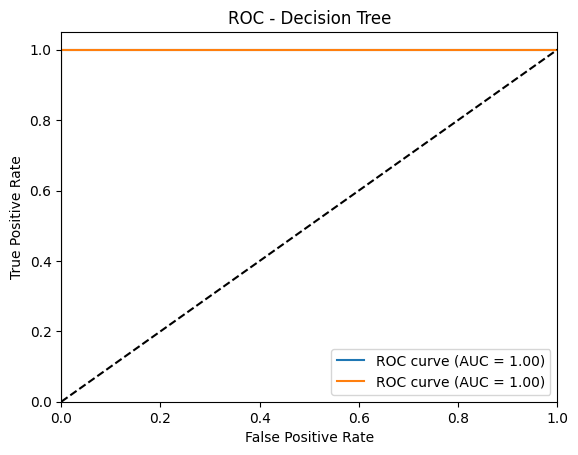

In [ ]:
fpr_tree_train, tpr_tree_train, thresholds_tree_train = roc_curve(y_train, y_prob_tree_train)
fpr_tree_test, tpr_tree_test, thresholds_tree_test = roc_curve(y_test, y_prob_tree_test)

# Obliczanie wartości AUC (Area Under the Curve)
auc_tree_train = roc_auc_score(y_train, y_prob_tree_train)
auc_tree_test = roc_auc_score(y_test, y_prob_tree_test)

# Wykres krzywej ROC dla modelu drzewa decyzyjnego
plt.figure()
plt.plot(fpr_tree_train, tpr_tree_train, label='ROC curve (AUC = %0.2f)' % auc_tree_train)
plt.plot(fpr_tree_test, tpr_tree_test, label='ROC curve (AUC = %0.2f)' % auc_tree_test)
plt.plot([0, 1], [0, 1], 'k--')  # Linia przerywana dla losowego klasyfikatora
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# LASY LOSOWE

##### ZBYT DŁUGI PROCES TRENINGU, ODPUŚCILIŚMY

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_model = RandomForestClassifier(max_depth=5)
rand_model.fit(X_train, y_train)

y_pred_rand_train = rand_model.predict(X_train)
y_pred_rand_test = rand_model.predict(X_test)
y_prob_rand_train = rand_model.predict_proba(X_train)[:, 1]
y_prob_rand_test = rand_model.predict_proba(X_test)[:, 1]

#### SPRAWDZAMY PODSTAWOWE METRYKI I MACIERZ BŁĘDU

In [ ]:
print(classification_report(y_train, y_pred_rand_train))

cm = confusion_matrix(y_train, y_pred_rand_train)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred_rand_test))

cm = confusion_matrix(y_test, y_pred_rand_test)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

#### RYSUJEMY KRZYWĄ ROC POKAZUJĄCĄ JAKOŚĆ KLASYFIKATORA

In [ ]:
fpr_rand_train, tpr_rand_train, thresholds_rand_train = roc_curve(y_train, y_prob_rand_train)
fpr_rand_test, tpr_rand_test, thresholds_rand_test = roc_curve(y_test, y_prob_rand_test)

# Obliczanie wartości AUC (Area Under the Curve)
auc_rand_train = roc_auc_score(y_train, y_prob_rand_train)
auc_rand_test = roc_auc_score(y_test, y_prob_rand_test)

# Wykres krzywej ROC dla modelu drzewa decyzyjnego
plt.figure()
plt.plot(fpr_rand_train, tpr_rand_train, label='ROC curve (AUC = %0.2f)' % auc_rand_train)
plt.plot(fpr_rand_test, tpr_rand_test, label='ROC curve (AUC = %0.2f)' % auc_rand_test)
plt.plot([0, 1], [0, 1], 'k--')  # Linia przerywana dla losowego klasyfikatora
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

# STANDARYZACJA

In [ ]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train_stand = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test_stand = ss_test.fit_transform(X_test)

# REGRESJA LOGISTYCZNA

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_stand, y_train)

y_pred_log_train = log_model.predict(X_train)
y_pred_log_test = log_model.predict(X_test)
y_prob_log_train = log_model.predict_proba(X_train)[:, 1]
y_prob_log_test = log_model.predict_proba(X_test)[:, 1]

C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\szymo\AppData\Local\Programs\Python\Python310

#### SPRAWDZAMY PODSTAWOWE METRYKI I MACIERZ BŁĘDU

              precision    recall  f1-score   support

           0       0.81      1.00      0.90   2901474
           1       1.00      0.77      0.87   2901474

    accuracy                           0.89   5802948
   macro avg       0.91      0.89      0.88   5802948
weighted avg       0.91      0.89      0.88   5802948



<Axes: >

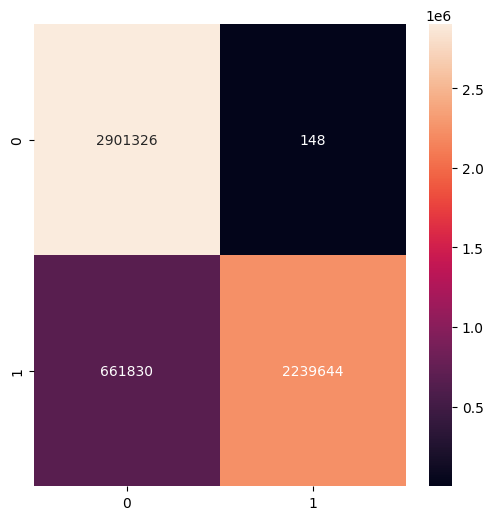

In [ ]:
print(classification_report(y_train, y_pred_log_train))

cm = confusion_matrix(y_train, y_pred_log_train)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    725638
           1       1.00      0.77      0.87    417164

    accuracy                           0.92   1142802
   macro avg       0.94      0.89      0.90   1142802
weighted avg       0.93      0.92      0.91   1142802



<Axes: >

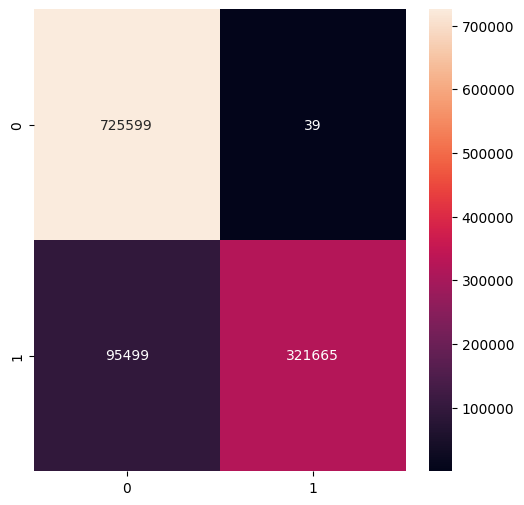

In [ ]:
print(classification_report(y_test, y_pred_log_test))

cm = confusion_matrix(y_test, y_pred_log_test)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

#### RYSUJEMY KRZYWĄ ROC POKAZUJĄCĄ JAKOŚĆ KLASYFIKATORA

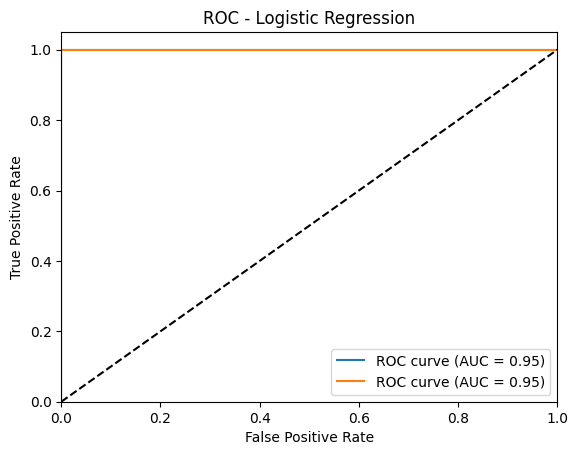

In [ ]:
fpr_log_train, tpr_log_train, thresholds_log_train = roc_curve(y_train, y_prob_log_train)
fpr_log_test, tpr_log_test, thresholds_log_test = roc_curve(y_test, y_prob_log_test)

# Obliczanie wartości AUC (Area Under the Curve)
auc_log_train = roc_auc_score(y_train, y_prob_log_train)
auc_log_test = roc_auc_score(y_test, y_prob_log_test)

# Wykres krzywej ROC dla modelu drzewa decyzyjnego
plt.figure()
plt.plot(fpr_tree_train, tpr_tree_train, label='ROC curve (AUC = %0.2f)' % auc_log_train)
plt.plot(fpr_tree_test, tpr_tree_test, label='ROC curve (AUC = %0.2f)' % auc_log_test)
plt.plot([0, 1], [0, 1], 'k--')  # Linia przerywana dla losowego klasyfikatora
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# SVC

In [ ]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(X_train_stand, y_train)

y_pred_svc_train = svc_model.predict(X_train)
y_pred_svc_test = svc_model.predict(X_test)

C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


#### SPRAWDZAMY PODSTAWOWE METRYKI I MACIERZ BŁĘDU

              precision    recall  f1-score   support

           0       0.87      1.00      0.93   2901474
           1       1.00      0.86      0.92   2901474

    accuracy                           0.93   5802948
   macro avg       0.94      0.93      0.93   5802948
weighted avg       0.94      0.93      0.93   5802948



<Axes: >

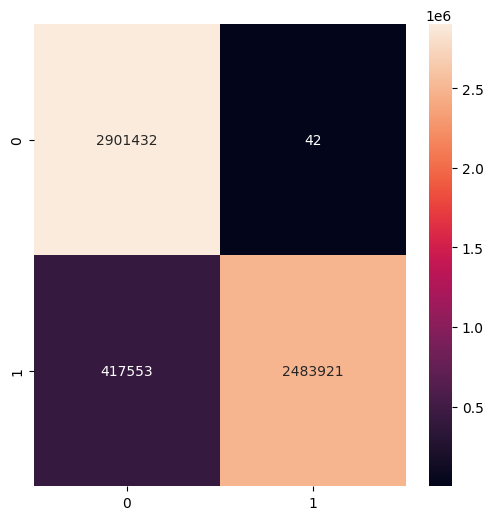

In [ ]:
print(classification_report(y_train, y_pred_svc_train))

cm = confusion_matrix(y_train, y_pred_svc_train)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    725638
           1       1.00      0.86      0.92    417164

    accuracy                           0.95   1142802
   macro avg       0.96      0.93      0.94   1142802
weighted avg       0.95      0.95      0.95   1142802



<Axes: >

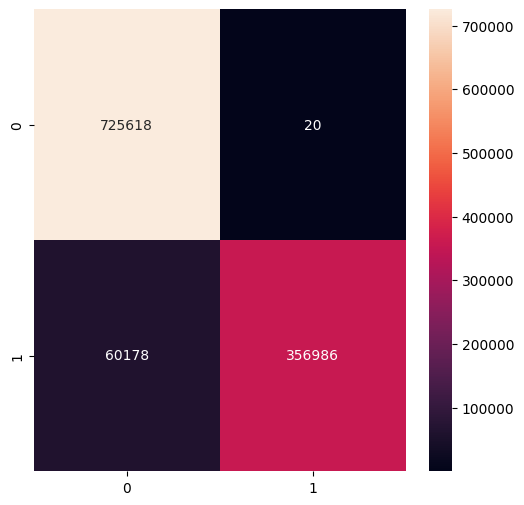

In [ ]:
print(classification_report(y_test, y_pred_svc_test))

cm = confusion_matrix(y_test, y_pred_svc_test)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

#### RYSUJEMY KRZYWĄ ROC POKAZUJĄCĄ JAKOŚĆ KLASYFIKATORA

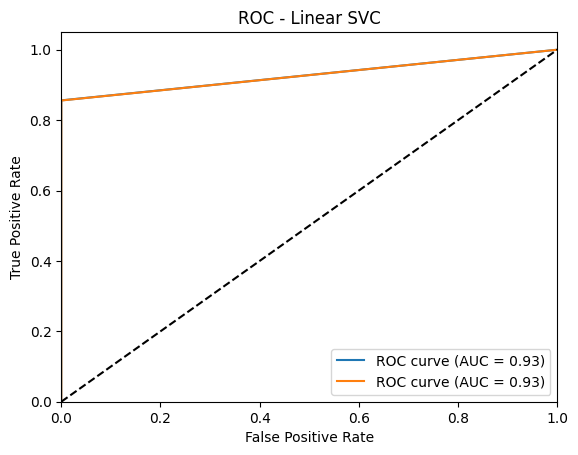

In [ ]:
fpr_svc_train, tpr_svc_train, thresholds_svc_train = roc_curve(y_train, y_pred_svc_train)
fpr_svc_test, tpr_svc_test, thresholds_svc_test = roc_curve(y_test, y_pred_svc_test)

# Obliczanie wartości AUC (Area Under the Curve)
auc_svc_train = roc_auc_score(y_train, y_pred_svc_train)
auc_svc_test = roc_auc_score(y_test, y_pred_svc_test)

# Wykres krzywej ROC dla modelu drzewa decyzyjnego
plt.figure()
plt.plot(fpr_svc_train, tpr_svc_train, label='ROC curve (AUC = %0.2f)' % auc_svc_train)
plt.plot(fpr_svc_test, tpr_svc_test, label='ROC curve (AUC = %0.2f)' % auc_svc_test)
plt.plot([0, 1], [0, 1], 'k--')  # Linia przerywana dla losowego klasyfikatora
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Linear SVC')
plt.legend(loc="lower right")
plt.show()

# GAUSSIAN NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train_stand, y_train)

y_pred_gnb_train = gnb_model.predict(X_train)
y_pred_gnb_test = gnb_model.predict(X_test)
y_prob_gnb_train = gnb_model.predict_proba(X_train)[:, 1]
y_prob_gnb_test = gnb_model.predict_proba(X_test)[:, 1]

C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


#### SPRAWDZAMY PODSTAWOWE METRYKI I MACIERZ BŁĘDU

C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00   2901474
           1       0.50      1.00      0.67   2901474

    accuracy                           0.50   5802948
   macro avg       0.25      0.50      0.33   5802948
weighted avg       0.25      0.50      0.33   5802948



<Axes: >

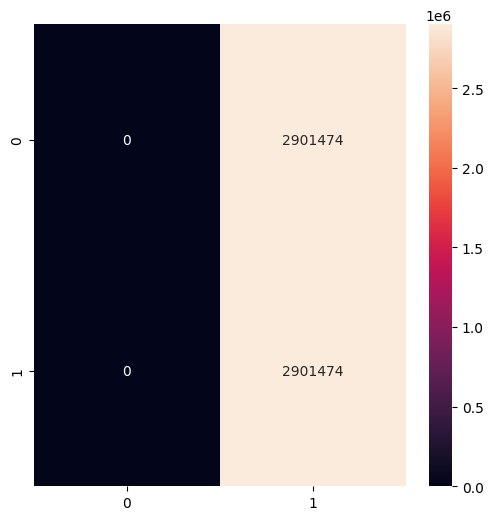

In [ ]:
print(classification_report(y_train, y_pred_gnb_train))

cm = confusion_matrix(y_train, y_pred_gnb_train)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d')

C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    725638
           1       0.37      1.00      0.53    417164

    accuracy                           0.37   1142802
   macro avg       0.18      0.50      0.27   1142802
weighted avg       0.13      0.37      0.20   1142802



C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

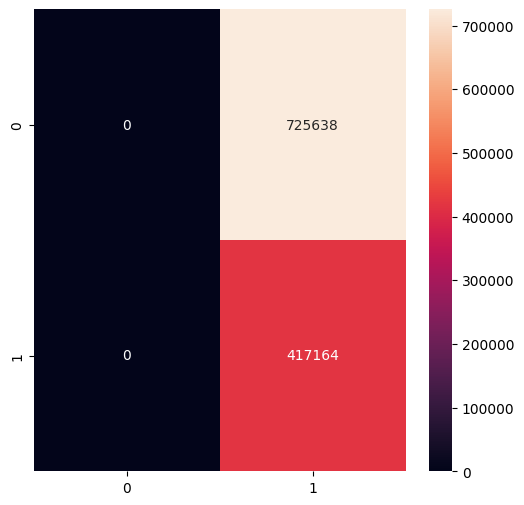

In [ ]:
print(classification_report(y_test, y_pred_gnb_test))

cm = confusion_matrix(y_test, y_pred_gnb_test)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

#### RYSUJEMY KRZYWĄ ROC POKAZUJĄCĄ JAKOŚĆ KLASYFIKATORA

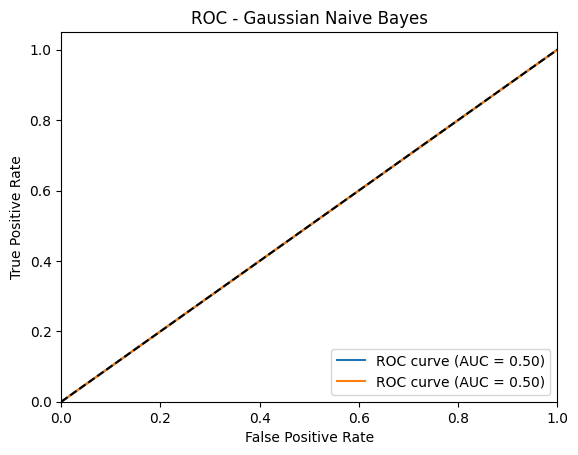

In [ ]:
fpr_gnb_train, tpr_gnb_train, thresholds_gnb_train = roc_curve(y_train, y_prob_gnb_train)
fpr_gnb_test, tpr_gnb_test, thresholds_gnb_test = roc_curve(y_test, y_prob_gnb_test)

# Obliczanie wartości AUC (Area Under the Curve)
auc_gnb_train = roc_auc_score(y_train, y_prob_gnb_train)
auc_gnb_test = roc_auc_score(y_test, y_prob_gnb_test)

# Wykres krzywej ROC dla modelu drzewa decyzyjnego
plt.figure()
plt.plot(fpr_gnb_train, tpr_gnb_train, label='ROC curve (AUC = %0.2f)' % auc_gnb_train)
plt.plot(fpr_gnb_test, tpr_gnb_test, label='ROC curve (AUC = %0.2f)' % auc_gnb_test)
plt.plot([0, 1], [0, 1], 'k--')  # Linia przerywana dla losowego klasyfikatora
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# NORMALIZACJA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_train_normal = mm_scaler.fit_transform(X_train)

mm_scaler = MinMaxScaler()
X_test_normal = mm_scaler.fit_transform(X_test)

# K-NAJBLIŻSZYCH SĄSIADÓW

##### ZBYT DŁUGI PROCES TRENINGU, ODPUŚCILIŚMY

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_stand, y_train)

y_pred_knn_train = knn_model.predict(X_train)
y_pred_knn_test = knn_model.predict(X_test)
y_prob_knn_train = knn_model.predict_proba(X_train)[:, 1]
y_prob_knn_test = knn_model.predict_proba(X_test)[:, 1]

#### SPRAWDZAMY PODSTAWOWE METRYKI I MACIERZ BŁĘDU

In [ ]:
print(classification_report(y_train, y_pred_knn_train))

cm = confusion_matrix(y_train, y_pred_knn_train)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred_knn_test))

cm = confusion_matrix(y_test, y_pred_knn_test)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

#### RYSUJEMY KRZYWĄ ROC POKAZUJĄCĄ JAKOŚĆ KLASYFIKATORA

In [ ]:
fpr_knn_train, tpr_knn_train, thresholds_knn_train = roc_curve(y_train, y_prob_knn_train)
fpr_knn_test, tpr_knn_test, thresholds_knn_test = roc_curve(y_test, y_prob_knn_test)

# Obliczanie wartości AUC (Area Under the Curve)
auc_knn_train = roc_auc_score(y_train, y_prob_knn_train)
auc_knn_test = roc_auc_score(y_test, y_prob_knn_test)

# Wykres krzywej ROC dla modelu drzewa decyzyjnego
plt.figure()
plt.plot(fpr_knn_train, tpr_knn_train, label='ROC curve (AUC = %0.2f)' % auc_knn_train)
plt.plot(fpr_knn_test, tpr_knn_test, label='ROC curve (AUC = %0.2f)' % auc_knn_test)
plt.plot([0, 1], [0, 1], 'k--')  # Linia przerywana dla losowego klasyfikatora
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# SIEĆ NEURONOWA

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=X_train_normal.shape[1]))
model.add(Dense(1, activation='sigmoid')) 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               5120      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
hist = model.fit(X_train_normal, y_train, validation_data=(X_test_normal, y_test), epochs=10, batch_size=100, callbacks=[es])

Epoch 1/10
58030/58030 [==============================] - 53s 896us/step - loss: 0.0396 - accuracy: 0.9882 - val_loss: 0.0276 - val_accuracy: 0.9839
Epoch 2/10
58030/58030 [==============================] - 53s 906us/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0183 - val_accuracy: 0.9896
Epoch 3/10
58030/58030 [==============================] - 54s 924us/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0316 - val_accuracy: 0.9824
Epoch 4/10
58030/58030 [==============================] - 53s 913us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0272 - val_accuracy: 0.9850
Epoch 5/10
58030/58030 [==============================] - 52s 902us/step - loss: 9.6813e-04 - accuracy: 0.9998 - val_loss: 0.0094 - val_accuracy: 0.9961
Epoch 6/10
58030/58030 [==============================] - 52s 902us/step - loss: 8.8168e-04 - accuracy: 0.9999 - val_loss: 0.0199 - val_accuracy: 0.9892
Epoch 7/10
58030/58030 [==============================] - 53s 912us/step - loss: 7.7286e-04 - accu

#### RYSUJEMY WYKRES POKAZUJĄCY PRZEBIEG TRANINGU MODELU NA METRYKACH ACCURACY, VAL_ACCURACY, LOSS, VAL_LOSS

[]

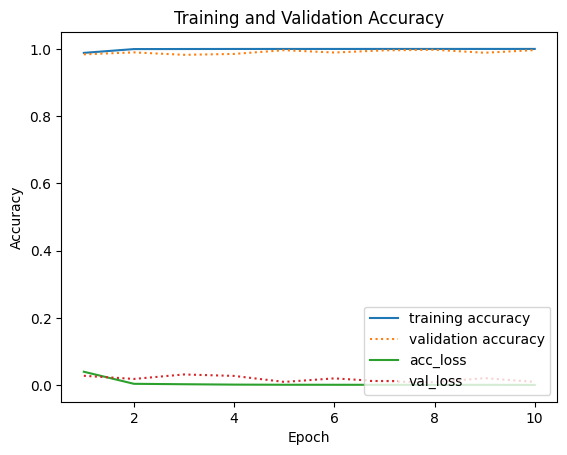

In [ ]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='training accuracy')
plt.plot(epochs, val, ':', label='validation accuracy')
plt.plot(epochs, loss, '-', label='acc_loss')
plt.plot(epochs, val_loss, ':', label='val_loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()